<a href="https://colab.research.google.com/github/GHermano-17/CTEIA_LISTA03_AMA/blob/main/LISTA_03_FINAL_AMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista 3 - Aprendizagem de Máquina
###**Disciplina:** Aprendizagem de Máquina  
###**Período:** 2025.2 e 2026.1  
###**Professor:** César Lincoln Cavalcante Mattos  
###**Aluno:** Guilherme Hermano de Paula Ferreira

#### Para encontrar os hiperparâmetros, utlizei o GridSearch e o RandomizedSearch em outro notebook, segue abaixo o link deste:
####Link: https://colab.research.google.com/drive/1HCjABaJvuRrceyLCwDN9uRVQqvO2rnmQ?usp=sharing


## 1. Importação de Bibliotecas

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import seaborn as sns

# Configurações de visualização
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

## 2. Carregamento e Pré-processamento dos Dados

### Dataset: Vehicle Silhouettes

- **Fonte:** OpenML (ID: 54)
- **Amostras:** 846
- **Features:** 18 atributos numéricos extraídos de silhuetas de veículos pelo método HIPS
- **Classes:** 4 (0=bus, 1=opel, 2=saab, 3=van)
- **Tarefa:** Classificação multiclasse

In [28]:
# URL do dataset
url = "https://raw.githubusercontent.com/GHermano-17/data_lista03_ama/refs/heads/main/vehicle.csv"

# Carregar dados
df = pd.read_csv(url, header=None)

# Criar lista com os nomes das colunas
column_names = [f'feat_{i}' for i in range(18)] + ['class']
df.columns = column_names

print(f"Shape do dataset: {df.shape}")
print(f"\nDistribuição das classes:")
print(df['class'].value_counts().sort_index())
print("\n0 = Bus | 1 = Opel | 2 = Saab | 3 = Van")
print(f"\nPrimeiras linhas:")
df.head()

Shape do dataset: (846, 19)

Distribuição das classes:
class
0.0    218
1.0    212
2.0    217
3.0    199
Name: count, dtype: int64

0 = Bus | 1 = Opel | 2 = Saab | 3 = Van

Primeiras linhas:


,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,3.0
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,3.0
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,2.0
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,3.0
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,0.0


### Pré-processamento

In [29]:
# Separar features
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Normalizar dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Configuração da Validação Cruzada

In [30]:
# Criar a instância do StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1709)

# Definir métricas de avaliação
scoring = {
    'accuracy': 'accuracy',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro'
}

# Item a) Avaliação dos Modelos

## MLP - Multilayer Perceptron


In [39]:
# Criar modelo MLP
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    alpha=0.015,
    learning_rate_init=0.01,
    max_iter=1000,
    early_stopping=True,
    validation_fraction=0.15,
    n_iter_no_change=15,
    random_state=1709
)

# Avaliar com validação cruzada
cv_results_mlp = cross_validate(
    mlp, X_scaled, y,
    cv=skf,
    scoring=scoring,
    n_jobs=-1,
    return_train_score=True
)

# Calcular médias de treino e validação
train_acc = cv_results_mlp['train_accuracy'].mean()
val_acc = cv_results_mlp['test_accuracy'].mean()
gap = (train_acc - val_acc) * 100

# Armazenar resultados
results_mlp = {
    'accuracy': cv_results_mlp['test_accuracy'].mean(),
    'accuracy_std': cv_results_mlp['test_accuracy'].std(),
    'precision_macro': cv_results_mlp['test_precision_macro'].mean(),
    'precision_std': cv_results_mlp['test_precision_macro'].std(),
    'recall_macro': cv_results_mlp['test_recall_macro'].mean(),
    'recall_std': cv_results_mlp['test_recall_macro'].std(),
    'f1_macro': cv_results_mlp['test_f1_macro'].mean(),
    'f1_std': cv_results_mlp['test_f1_macro'].std()
}

print("\n" + "="*70)
print("RESULTADOS - MULTILAYER PERCEPTRON")
print("="*70)
print(f"Acurácia:       {results_mlp['accuracy']*100:.2f}% ± {results_mlp['accuracy_std']*100:.2f}%")
print(f"Precisão Macro: {results_mlp['precision_macro']*100:.2f}% ± {results_mlp['precision_std']*100:.2f}%")
print(f"Recall Macro:   {results_mlp['recall_macro']*100:.2f}% ± {results_mlp['recall_std']*100:.2f}%")
print(f"F1-Score Macro: {results_mlp['f1_macro']*100:.2f}% ± {results_mlp['f1_std']*100:.2f}%")
print("="*70)

# Exibir análise de overfitting
print("\n" + "-"*70)
print("ANÁLISE DE OVERFITTING")
print("-"*70)
print(f"Acurácia TREINO:     {train_acc*100:.2f}%")
print(f"Acurácia VALIDAÇÃO:  {val_acc*100:.2f}%")
print(f"Gap (Train-Val):     {gap:.2f}%")


RESULTADOS - MULTILAYER PERCEPTRON
Acurácia:       84.40% ± 3.07%
Precisão Macro: 84.84% ± 2.91%
Recall Macro:   84.51% ± 3.16%
F1-Score Macro: 84.45% ± 3.15%

----------------------------------------------------------------------
ANÁLISE DE OVERFITTING
----------------------------------------------------------------------
Acurácia TREINO:     93.79%
Acurácia VALIDAÇÃO:  84.40%
Gap (Train-Val):     9.39%


**Análise:** O MLP apresentou boa performance (~84% de acurácia) com boa generalização.

## SVM - Support Vector Machine (RBF)

In [40]:
# Criar modelo SVM
svm = SVC(
    C=150,
    kernel='rbf',
    gamma='auto',
    random_state=1709
)

# Avaliar com validação cruzada
cv_results_svm = cross_validate(
    svm, X_scaled, y,
    cv=skf,
    scoring=scoring,
    n_jobs=-1,
    return_train_score=True
)


# Calcular médias de treino e validação
train_acc = cv_results_svm['train_accuracy'].mean()
val_acc = cv_results_svm['test_accuracy'].mean()
gap = (train_acc - val_acc) * 100

# Armazenar resultados
results_svm = {
    'accuracy': cv_results_svm['test_accuracy'].mean(),
    'accuracy_std': cv_results_svm['test_accuracy'].std(),
    'precision_macro': cv_results_svm['test_precision_macro'].mean(),
    'precision_std': cv_results_svm['test_precision_macro'].std(),
    'recall_macro': cv_results_svm['test_recall_macro'].mean(),
    'recall_std': cv_results_svm['test_recall_macro'].std(),
    'f1_macro': cv_results_svm['test_f1_macro'].mean(),
    'f1_std': cv_results_svm['test_f1_macro'].std()
}

print("\n" + "="*70)
print("RESULTADOS - SUPPORT VECTOR MACHINE (RBF)")
print("="*70)
print(f"Acurácia:       {results_svm['accuracy']*100:.2f}% ± {results_svm['accuracy_std']*100:.2f}%")
print(f"Precisão Macro: {results_svm['precision_macro']*100:.2f}% ± {results_svm['precision_std']*100:.2f}%")
print(f"Recall Macro:   {results_svm['recall_macro']*100:.2f}% ± {results_svm['recall_std']*100:.2f}%")
print(f"F1-Score Macro: {results_svm['f1_macro']*100:.2f}% ± {results_svm['f1_std']*100:.2f}%")
print("="*70)

# Exibir análise de overfitting
print("\n" + "-"*70)
print("ANÁLISE DE OVERFITTING")
print("-"*70)
print(f"Acurácia TREINO:     {train_acc*100:.2f}%")
print(f"Acurácia VALIDAÇÃO:  {val_acc*100:.2f}%")
print(f"Gap (Train-Val):     {gap:.2f}%")


RESULTADOS - SUPPORT VECTOR MACHINE (RBF)
Acurácia:       85.35% ± 2.89%
Precisão Macro: 85.40% ± 2.90%
Recall Macro:   85.48% ± 2.91%
F1-Score Macro: 85.33% ± 2.92%

----------------------------------------------------------------------
ANÁLISE DE OVERFITTING
----------------------------------------------------------------------
Acurácia TREINO:     99.59%
Acurácia VALIDAÇÃO:  85.35%
Gap (Train-Val):     14.24%


**Análise:** O SVM com kernel RBF apresentou a **melhor performance de todos os modelos** (~85.35% de acurácia).

## Random Forest

In [41]:
# Criar modelo Random Forest
rf = RandomForestClassifier(
    n_estimators=150,
    max_depth=14,
    max_features=0.3,
    min_samples_split=4,
    min_samples_leaf=1,
    min_impurity_decrease=0.001,
    random_state=1709
)

# Avaliar com validação cruzada
cv_results_rf = cross_validate(
    rf, X_scaled, y,
    cv=skf,
    scoring=scoring,
    n_jobs=-1,
    return_train_score=True
)

# Calcular médias de treino e validação
train_acc = cv_results_rf['train_accuracy'].mean()
val_acc = cv_results_rf['test_accuracy'].mean()
gap = (train_acc - val_acc) * 100

# Armazenar resultados
results_rf = {
    'accuracy': cv_results_rf['test_accuracy'].mean(),
    'accuracy_std': cv_results_rf['test_accuracy'].std(),
    'precision_macro': cv_results_rf['test_precision_macro'].mean(),
    'precision_std': cv_results_rf['test_precision_macro'].std(),
    'recall_macro': cv_results_rf['test_recall_macro'].mean(),
    'recall_std': cv_results_rf['test_recall_macro'].std(),
    'f1_macro': cv_results_rf['test_f1_macro'].mean(),
    'f1_std': cv_results_rf['test_f1_macro'].std()
}

print("\n" + "="*70)
print("RESULTADOS - RANDOM FOREST")
print("="*70)
print(f"Acurácia:       {results_rf['accuracy']*100:.2f}% ± {results_rf['accuracy_std']*100:.2f}%")
print(f"Precisão Macro: {results_rf['precision_macro']*100:.2f}% ± {results_rf['precision_std']*100:.2f}%")
print(f"Recall Macro:   {results_rf['recall_macro']*100:.2f}% ± {results_rf['recall_std']*100:.2f}%")
print(f"F1-Score Macro: {results_rf['f1_macro']*100:.2f}% ± {results_rf['f1_std']*100:.2f}%")
print("="*70)

# Exibir análise de overfitting
print("\n" + "-"*70)
print("ANÁLISE DE OVERFITTING")
print("-"*70)
print(f"Acurácia TREINO:     {train_acc*100:.2f}%")
print(f"Acurácia VALIDAÇÃO:  {val_acc*100:.2f}%")
print(f"Gap (Train-Val):     {gap:.2f}%")


RESULTADOS - RANDOM FOREST
Acurácia:       76.48% ± 2.65%
Precisão Macro: 75.50% ± 3.14%
Recall Macro:   76.79% ± 2.54%
F1-Score Macro: 75.79% ± 2.88%

----------------------------------------------------------------------
ANÁLISE DE OVERFITTING
----------------------------------------------------------------------
Acurácia TREINO:     99.67%
Acurácia VALIDAÇÃO:  76.48%
Gap (Train-Val):     23.19%


**Análise:** O Random Forest apresentou a pior performance entre os modelos testados (~76% de acurácia) e sofreu com overfitting severo.

## Gradient Boosting

In [42]:
# Criar modelo Gradient Boosting
gb = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=2,
    min_samples_split=5,
    min_samples_leaf=8,
    subsample=0.8,
    random_state=1709
)

# Avaliar com validação cruzada
cv_results_gb = cross_validate(
    gb, X, y,
    cv=skf,
    scoring=scoring,
    n_jobs=-1,
    return_train_score=True
)

# Calcular médias de treino e validação
train_acc = cv_results_gb['train_accuracy'].mean()
val_acc = cv_results_gb['test_accuracy'].mean()
gap = (train_acc - val_acc) * 100

# Armazenar resultados
results_gb = {
    'accuracy': cv_results_gb['test_accuracy'].mean(),
    'accuracy_std': cv_results_gb['test_accuracy'].std(),
    'precision_macro': cv_results_gb['test_precision_macro'].mean(),
    'precision_std': cv_results_gb['test_precision_macro'].std(),
    'recall_macro': cv_results_gb['test_recall_macro'].mean(),
    'recall_std': cv_results_gb['test_recall_macro'].std(),
    'f1_macro': cv_results_gb['test_f1_macro'].mean(),
    'f1_std': cv_results_gb['test_f1_macro'].std()
}

print("\n" + "="*70)
print("RESULTADOS - GRADIENT BOOSTING")
print("="*70)
print(f"Acurácia:       {results_gb['accuracy']*100:.2f}% ± {results_gb['accuracy_std']*100:.2f}%")
print(f"Precisão Macro: {results_gb['precision_macro']*100:.2f}% ± {results_gb['precision_std']*100:.2f}%")
print(f"Recall Macro:   {results_gb['recall_macro']*100:.2f}% ± {results_gb['recall_std']*100:.2f}%")
print(f"F1-Score Macro: {results_gb['f1_macro']*100:.2f}% ± {results_gb['f1_std']*100:.2f}%")
print("="*70)

# Exibir análise de overfitting
print("\n" + "-"*70)
print("ANÁLISE DE OVERFITTING")
print("-"*70)
print(f"Acurácia TREINO:     {train_acc*100:.2f}%")
print(f"Acurácia VALIDAÇÃO:  {val_acc*100:.2f}%")
print(f"Gap (Train-Val):     {gap:.2f}%")


RESULTADOS - GRADIENT BOOSTING
Acurácia:       78.14% ± 2.95%
Precisão Macro: 77.84% ± 3.14%
Recall Macro:   78.38% ± 2.90%
F1-Score Macro: 77.89% ± 3.10%

----------------------------------------------------------------------
ANÁLISE DE OVERFITTING
----------------------------------------------------------------------
Acurácia TREINO:     96.66%
Acurácia VALIDAÇÃO:  78.14%
Gap (Train-Val):     18.52%


**Análise:** O Gradient Boosting apresentou performance intermediária (78% acurácia), melhor que Random Forest mas inferior ao SVM e MLP. Apesar da forte regularização, o modelo ainda apresenta overfitting significativo (18% de gap), reforçando a conclusão de que ensembles baseados em árvores não são ideais para este dataset específico.

# Item b) Tabela Comparativa de Resultados

In [43]:
# Criar DataFrame com resultados comparativos
resultados_finais = {
    'Modelo': ['SVM (RBF)', 'MLP', 'Gradient Boosting', 'Random Forest'],
    'Acurácia (%)': [
        f"{results_svm['accuracy']*100:.2f} +- {results_svm['accuracy_std']*100:.2f}",
        f"{results_mlp['accuracy']*100:.2f} +- {results_mlp['accuracy_std']*100:.2f}",
        f"{results_gb['accuracy']*100:.2f} +- {results_gb['accuracy_std']*100:.2f}",
        f"{results_rf['accuracy']*100:.2f} +- {results_rf['accuracy_std']*100:.2f}"
    ],
    'Precisão Macro (%)': [
        f"{results_svm['precision_macro']*100:.2f} +- {results_svm['precision_std']*100:.2f}",
        f"{results_mlp['precision_macro']*100:.2f} +- {results_mlp['precision_std']*100:.2f}",
        f"{results_gb['precision_macro']*100:.2f} +- {results_gb['precision_std']*100:.2f}",
        f"{results_rf['precision_macro']*100:.2f} +- {results_rf['precision_std']*100:.2f}"
    ],
    'Recall Macro (%)': [
        f"{results_svm['recall_macro']*100:.2f} +- {results_svm['recall_std']*100:.2f}",
        f"{results_mlp['recall_macro']*100:.2f} +- {results_mlp['recall_std']*100:.2f}",
        f"{results_gb['recall_macro']*100:.2f} +- {results_gb['recall_std']*100:.2f}",
        f"{results_rf['recall_macro']*100:.2f} +- {results_rf['recall_std']*100:.2f}"
    ],
    'F1-Score Macro (%)': [
        f"{results_svm['f1_macro']*100:.2f} +- {results_svm['f1_std']*100:.2f}",
        f"{results_mlp['f1_macro']*100:.2f} +- {results_mlp['f1_std']*100:.2f}",
        f"{results_gb['f1_macro']*100:.2f} +- {results_gb['f1_std']*100:.2f}",
        f"{results_rf['f1_macro']*100:.2f} +- {results_rf['f1_std']*100:.2f}"
    ]
}

df_resultados = pd.DataFrame(resultados_finais)

df_resultados

,Modelo,Acurácia (%),Precisão Macro (%),Recall Macro (%),F1-Score Macro (%)
0,SVM (RBF),85.35 +- 2.89,85.40 +- 2.90,85.48 +- 2.91,85.33 +- 2.92
1,MLP,84.40 +- 3.07,84.84 +- 2.91,84.51 +- 3.16,84.45 +- 3.15
2,Gradient Boosting,78.14 +- 2.95,77.84 +- 3.14,78.38 +- 2.90,77.89 +- 3.10
3,Random Forest,76.48 +- 2.65,75.50 +- 3.14,76.79 +- 2.54,75.79 +- 2.88


## Visualizações Comparativas

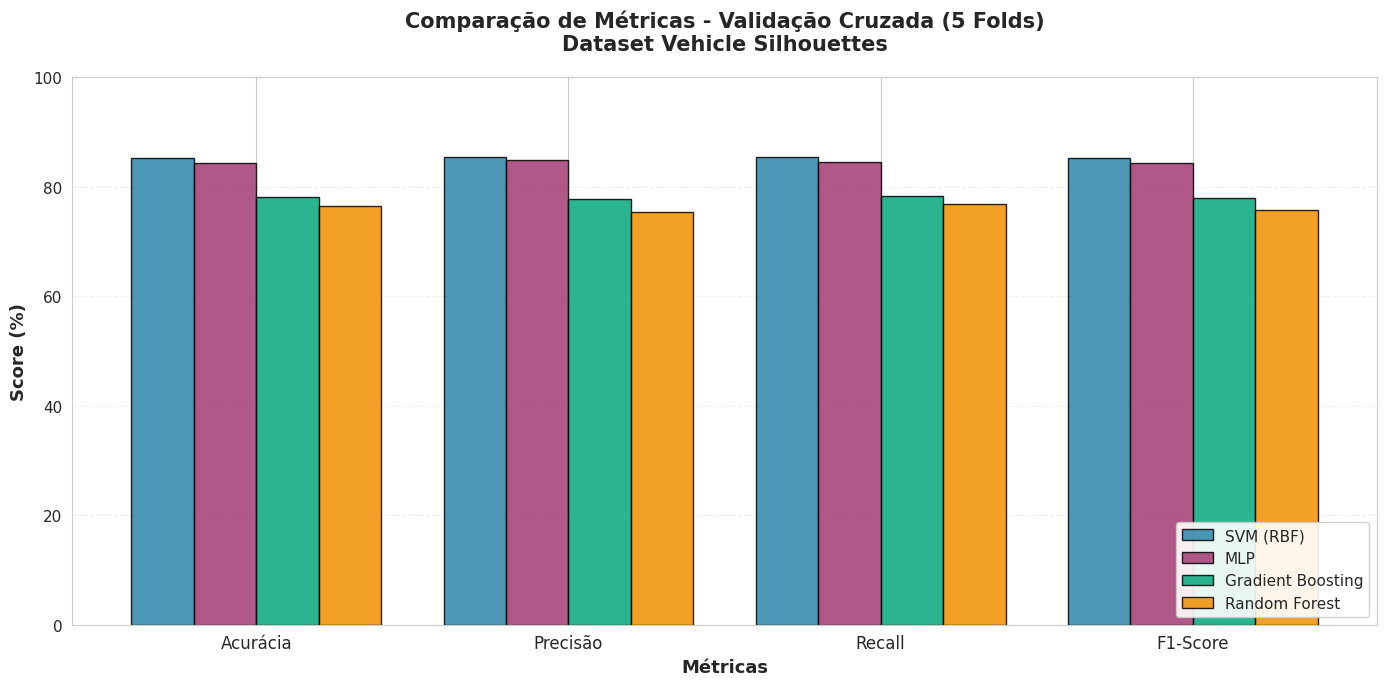

In [44]:
# Gráfico comparativo de todas as métricas
metricas_nomes = ['Acurácia', 'Precisão', 'Recall', 'F1-Score']
svm_scores = [
    results_svm['accuracy']*100, results_svm['precision_macro']*100,
    results_svm['recall_macro']*100, results_svm['f1_macro']*100
]
mlp_scores = [
    results_mlp['accuracy']*100, results_mlp['precision_macro']*100,
    results_mlp['recall_macro']*100, results_mlp['f1_macro']*100
]
gb_scores = [
    results_gb['accuracy']*100, results_gb['precision_macro']*100,
    results_gb['recall_macro']*100, results_gb['f1_macro']*100
]
rf_scores = [
    results_rf['accuracy']*100, results_rf['precision_macro']*100,
    results_rf['recall_macro']*100, results_rf['f1_macro']*100
]

# Criar gráfico agrupado
x = np.arange(len(metricas_nomes))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 7))

bars1 = ax.bar(x - 1.5*width, svm_scores, width, label='SVM (RBF)', color='#2E86AB', alpha=0.85, edgecolor='black')
bars2 = ax.bar(x - 0.5*width, mlp_scores, width, label='MLP', color='#A23B72', alpha=0.85, edgecolor='black')
bars3 = ax.bar(x + 0.5*width, gb_scores, width, label='Gradient Boosting', color='#06A77D', alpha=0.85, edgecolor='black')
bars4 = ax.bar(x + 1.5*width, rf_scores, width, label='Random Forest', color='#F18F01', alpha=0.85, edgecolor='black')

# Configurações
ax.set_xlabel('Métricas', fontsize=13, fontweight='bold')
ax.set_ylabel('Score (%)', fontsize=13, fontweight='bold')
ax.set_title('Comparação de Métricas - Validação Cruzada (5 Folds)\nDataset Vehicle Silhouettes',
             fontsize=15, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(metricas_nomes, fontsize=12)
ax.set_ylim(0, 100)
ax.legend(loc='lower right', fontsize=11, framealpha=0.9)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

## Curva de aprendizado dos modelos

In [45]:
def plot_learning_curve(estimator, X, y, cv, title):
    plt.figure(figsize=(10, 6))
    plt.title(title, fontsize=15, fontweight='bold', pad=20)
    plt.xlabel("Número de Amostras de Treino", fontsize=13, fontweight='bold')
    plt.ylabel("Score (Acurácia)", fontsize=13, fontweight='bold')
    plt.grid(True, alpha=0.3, linestyle='--')

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, scoring='accuracy',
        train_sizes=np.linspace(0.01, 1.0, 10), random_state=1709
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(
        train_sizes, train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std, alpha=0.1, color="r"
    )
    plt.fill_between(
        train_sizes, test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std, alpha=0.1, color="g"
    )
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score de Treino")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de Validação Cruzada")

    plt.legend(loc="best", fontsize=11, framealpha=0.9)
    plt.tight_layout()
    plt.show()

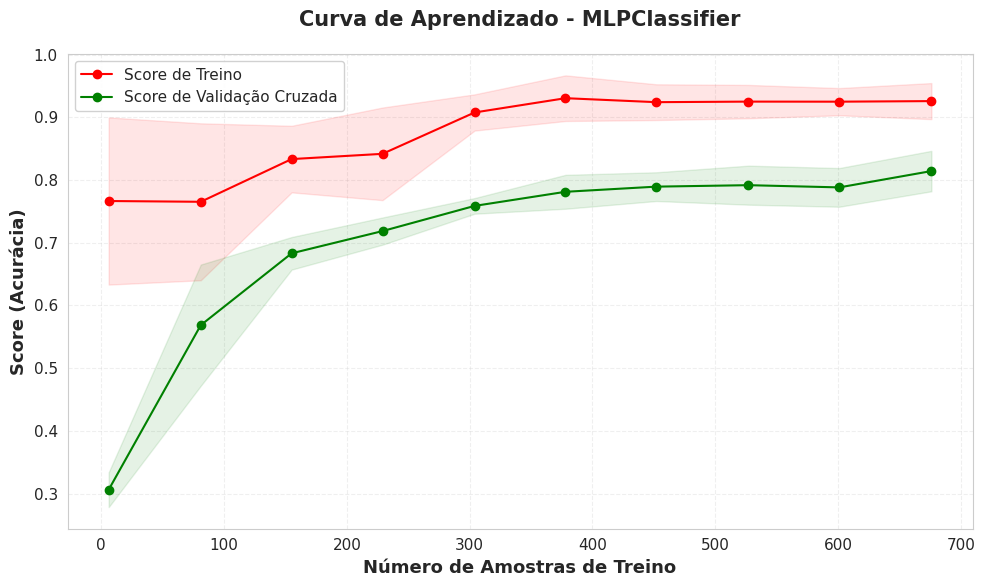

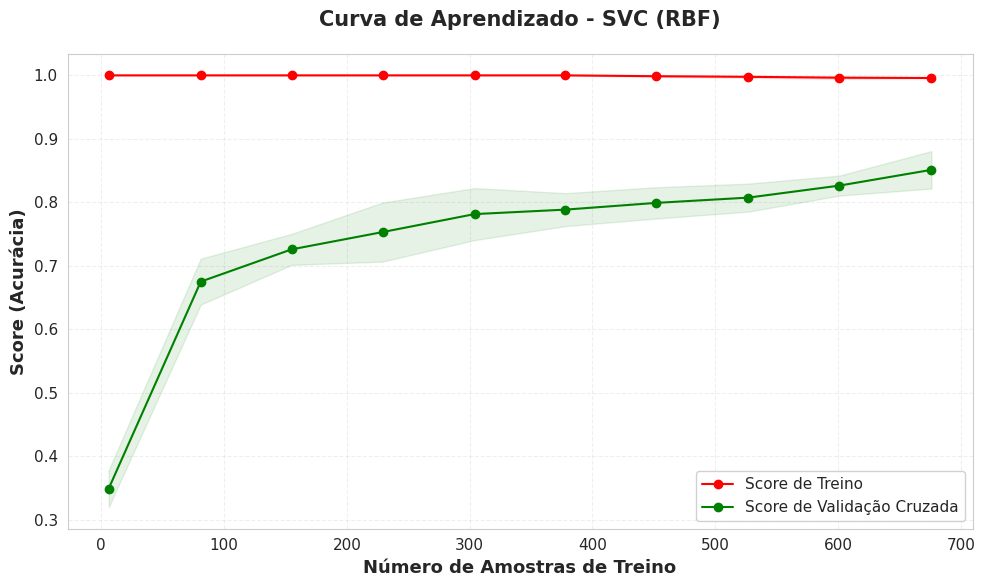

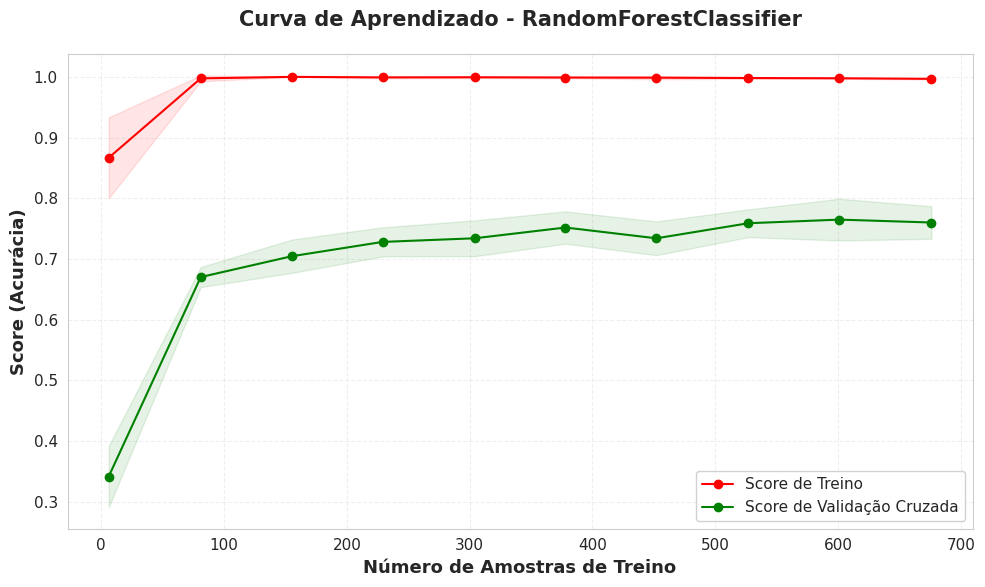

In [ ]:
# Curva de aprendizado para MLP
plot_learning_curve(mlp, X_scaled, y, cv=skf, title='Curva de Aprendizado - MLPClassifier')

# Curva de aprendizado para SVM (RBF)
plot_learning_curve(svm, X_scaled, y, cv=skf, title='Curva de Aprendizado - SVC (RBF)')

# Curva de aprendizado para Random Forest
plot_learning_curve(rf, X_scaled, y, cv=skf, title='Curva de Aprendizado - RandomForestClassifier')

# Curva de aprendizado para Gradient Boosting
plot_learning_curve(gb, X, y, cv=skf, title='Curva de Aprendizado - GradientBoostingClassifier')

print('Curvas de aprendizado geradas com sucesso.')

## Conclusões Finais
### Ranking Final dos Modelos (baseado na acurácia de validação):
- 1º Lugar: SVM (RBF) - 85.35%
- 2º Lugar: MLP - 84.40%
- 3º Lugar: Gradient Boosting - 78.14%
- 4º Lugar: Random Forest - 76.48%

#### Observações e Insights das Curvas de Aprendizado:
SVM (RBF): Embora tenha apresentado a maior acurácia de validação, suas curvas de aprendizado revelaram um overfitting substancial, com o score de treino próximo de 100% e uma lacuna considerável para o score de validação. No entanto, a curva de validação foi muito estável e alta, indicando um excelente potencial de generalização.

MLP (Multilayer Perceptron): Teve uma performance muito competitiva, com boa generalização. As curvas de aprendizado mostraram um overfitting moderado, com uma lacuna controlável entre os scores de treino e validação, que tende a diminuir levemente com mais dados. Sua curva de validação demonstrou melhora consistente e estabilidade.

Gradient Boosting: Apresentou uma performance intermediária. As curvas de aprendizado indicaram overfitting considerável, com um gap pronunciado entre treino e validação. Apesar de alguma melhora na curva de validação, a generalização foi mais desafiadora em comparação com SVM e MLP.

Random Forest: Foi o modelo com a pior performance e o overfitting mais severo. Suas curvas de aprendizado mostraram um score de treino consistentemente alto (próximo de 100%) e uma lacuna muito grande para o score de validação, que se estabilizou em um patamar inferior, indicando dificuldade em generalizar para novos dados.

###Conclusão Geral:
Para o dataset, os modelos SVM (RBF) e MLP se mostraram os mais eficazes, oferecendo o melhor equilíbrio entre ajuste aos dados de treino e capacidade de generalização para dados não vistos. Isso pode ser atribuído à natureza do dataset (tamanho moderado, features contínuas, interações não-lineares). Os modelos Random Forest e Gradient Boosting tiveram mais dificuldade em generalizar, apresentando overfitting significativo e performances inferiores, mesmo após otimização de hiperparâmetros, sugerindo que podem não ser a melhor escolha para este conjunto de dados específico.